<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Monte-Carlo-Simulation" data-toc-modified-id="Monte-Carlo-Simulation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Monte Carlo Simulation</a></span><ul class="toc-item"><li><span><a href="#寫法一" data-toc-modified-id="寫法一-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>寫法一</a></span></li><li><span><a href="#寫法一，完整版" data-toc-modified-id="寫法一，完整版-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>寫法一，完整版</a></span></li><li><span><a href="#寫法二" data-toc-modified-id="寫法二-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>寫法二</a></span></li></ul></li><li><span><a href="#蒙地卡羅視覺化" data-toc-modified-id="蒙地卡羅視覺化-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>蒙地卡羅視覺化</a></span><ul class="toc-item"><li><span><a href="#生成畫布大小" data-toc-modified-id="生成畫布大小-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>生成畫布大小</a></span></li><li><span><a href="#把模擬的點標在圖上" data-toc-modified-id="把模擬的點標在圖上-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>把模擬的點標在圖上</a></span><ul class="toc-item"><li><span><a href="#完整版" data-toc-modified-id="完整版-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>完整版</a></span></li></ul></li><li><span><a href="#做成-GIF" data-toc-modified-id="做成-GIF-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>做成 GIF</a></span></li></ul></li></ul></div>

# Monte Carlo Simulation

$$ 圓面積 = \pi \times r^2 = (正方形邊長平方)^2 \times \frac{落入圓內的次數}{總共模擬的次數}$$

---
## 寫法一

先載入套件

In [1]:
import random

----
**先嘗試一次，作一些簡單判定。**

- 利用 random 的 uniform 來幫忙產生 x(-1~1) 和 y(-1~1)  
- 注意random.uniform(a, b)函式的一些小限制。  
> Get a random number in the range [a, b) or [a, b] depending on rounding

- 判定在圓內，或是在圓外。目前將在圓上(例如x=1,y=1)的點視為圓內

In [2]:
x = random.uniform(-1, 1)
y = random.uniform(-1, 1)

# 小數點太多可以這樣表示
# print("座標點:(", round(x, ndigits = 4), ",", round(y, ndigits = 4), ")")
print("座標點:(", x, ",", y, ")")
if x**2 + y**2 <= 1:
    print("在圓內")
else:
    print("在圓外")

---
**嘗試模擬多次，加入迴圈**

In [3]:
# 紀錄圓內的點數
incircle = 0

# 紀錄圓外的點數
outcircle = 0

# 模擬一千萬的點
for i in range(10000000):
    # 我們使用 random 的 uniform 來幫我們產生 x(-1~1) 和 y(-1~1)
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    
    # 判定在圓內, 或是在圓外。目前將在圓上(例如x=1,y=1)的點視為圓內。就算將圓上當作圓外, 這些點非常稀少, 無傷大雅
    if x ** 2 + y ** 2 < 1:
        incircle = incircle + 1
    else:
        outcircle = outcircle + 1

In [4]:
print("圓內數:", incircle)
print("圓外數:", outcircle)

total = incircle + outcircle
probability = incircle / total
print("圓內機率:", probability * 100, "%")

# 4 是正方形面積
print("圓周率:", 4 * probability)

圓內數: 7854915
圓外數: 2145085
圓內機率: 78.54915 %
圓周率: 3.141966


---
## 寫法一，完整版

**小補充skill:**
- Jupyter Magic Commands
    - %%time: 給出cell的代碼運行一次所花費的時間。
    - %timeit: 使用Python的timeit模塊，它將會執行一個語句100000次(默認情況下)，然後給出運行最快3次的平均值。
    - %prun: 使用%prun statement_name將會產生一個有序表格來展示在該語句中所調用的每個內部函數調用的次數，每次調用的時間與該函數累計運行的時間。

In [5]:
%%time

# 紀錄圓內的飛鏢數
incircle = 0

# 紀錄圓外的飛鏢數
outcircle = 0

# 丟一千萬支飛鏢
for i in range(10000000):
    # 我們使用 random 的 uniform 來幫我們產生 x(-1~1) 和 y(-1~1)
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    
    # 判定在圓內, 或是在圓外。目前將在圓上(例如x=1,y=1)的點視為圓內。就算將圓上當作圓外, 這些點非常稀少, 無傷大雅
    if x ** 2 + y ** 2 < 1:
        incircle = incircle + 1
    else:
        outcircle = outcircle + 1

print("圓內數:", incircle)
print("圓外數:", outcircle)

total = incircle + outcircle
probability = incircle / total
print("圓內機率:", probability * 100, "%")

# 4 是正方形面積
print("圓周率:", 4 * probability)

圓內數: 7853514
圓外數: 2146486
圓內機率: 78.53514 %
圓周率: 3.1414056
Wall time: 12.7 s


---
## 寫法二

先載入套件

In [6]:
import random

In [7]:
N = 50001 #simulation times

# only simulate a quarter of circle
# length of square is 1
square_len = 1
print("PI =", 
      4 * len([1 for i in range(1, N) if random.random()**2 + random.random()**2 < square_len]) / (N - 1))

PI = 3.13888


# 蒙地卡羅視覺化

**注意**  
在程式中的座標軸系統跟我們平常習慣的不太一樣，左上為原點，往下 y 軸增加

---
先載入套件

In [8]:
import random
from PIL import Image, ImageDraw, ImageFont

## 生成畫布大小

In [9]:
# 畫布大小
width = 300
height = 300

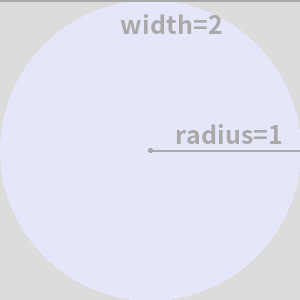

In [10]:
# new 出一個 300x300 的空白圖片, 背景設置成灰色 (R=220, G=220, B=220)
image = Image.new('RGBA', (width, height), color=(220,220,220))

# 準備畫筆
draw = ImageDraw.Draw(image)

# 畫(橢)圓, 這裡的 tuple 表示四個位置分別是 (左上 x, 左上 y, 右下 x, 右下 y)
# 也就是(橢)圓會填滿這個四邊形。
draw.ellipse((0, 0, width, height), fill=(230,230,250))

# 畫線, 畫半徑的線
draw.line((width/2, height/2, width, height/2), fill=(169, 169, 169), width=2)

# 畫圓心。不是在畫點，而是在畫一個很小的圓。
draw.ellipse((width/2 - 2, height/2 - 2, width/2 + 2, height/2 + 2), fill=(169, 169, 169))

# 準備字型, 25 字體大小
fnt = ImageFont.truetype("../fonts/NotoSansCJKtc-Bold.otf", 25)
draw.text((175, 115), "radius=1", font=fnt, fill=(169, 169, 169))
draw.line((0, 0, 300, 0), fill=(169, 169, 169), width=2) #這行其實可以省略
draw.text((120, 5), "width=2", font=fnt, fill=(169, 169, 169))

# 如果在普通.py 請使用 image.show()
image

---
開始往圖片區域丟飛鏢

## 把模擬的點標在圖上

一個一個點模擬，每次模擬完儲存圖片，共儲存100張圖片。  
注意 **底圖、畫筆變數** 的不同

In [11]:
# 準備的 list 是來儲存等等我們要做 GIF 的所有 image
imglist = []
incircle = 0
outcircle = 0

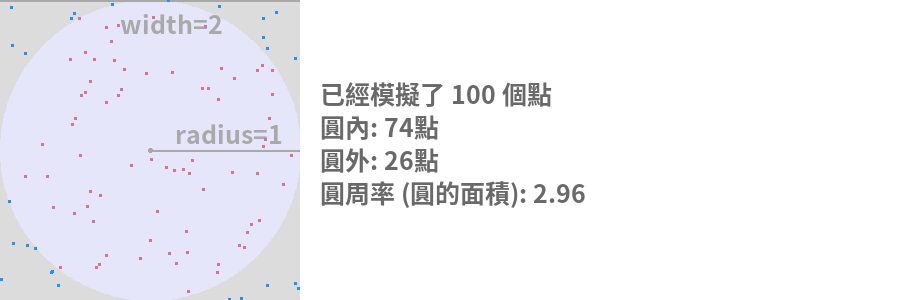

In [12]:
for point in range(100):
    # print(point) #顯示進度
    
    # 準備 900*300 來接剛剛的圓
    # 準備畫筆，這邊的畫筆是用來寫文字的
    # 設定字型
    fullimage = Image.new(mode='RGBA', size=(3 * width, height), color="white")
    fulldraw = ImageDraw.Draw(fullimage)
    fnt = ImageFont.truetype('../fonts/NotoSansCJKtc-Bold.otf', 25)
    
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    
    # 把 x: -1, 1 轉化到座標系統的 0, 300
    # 把 y: 1, -1 轉化到座標系統的 0, 300(反過來，因為程式的座標與我們想的不一樣)
    # 這個座標的轉換想一下，可以學起來。
    coordx = int(x*width/2 + width/2)
    coordy = int(-1*y*height/2 + height/2)
    
    if x ** 2 + y ** 2 <= 1:
        incircle = incircle+1
        
        # 在圓內的點以紅圓點表示
        draw.ellipse((coordx-1, coordy-1, coordx+1, coordy+1), fill = (219, 112, 147))
    else:
        outcircle = outcircle+1
        
        # 在圓外的點以藍圓點表示
        draw.ellipse((coordx-1, coordy-1, coordx+1, coordy+1), fill = (30,144,255))
    
    # 把 image 貼在整張大圖(底圖)的原點
    fullimage.paste(image.copy())
    
    # 文字message。把文字接起來的方法可以學習一下。
    msg = "已經模擬了 " + str(incircle + outcircle) + " 個點\n"
    msg = msg + "圓內: " + str(incircle) + "點\n"
    msg = msg + "圓外: " + str(outcircle) + "點\n"
    msg = msg + "圓周率 (圓的面積): " + str(4 * incircle / (incircle + outcircle)) + "\n"
    
    # 把準備好的 message 畫入圖中
    fulldraw.multiline_text((width + 20, height/4), msg, font=fnt, fill=(105,105,105))
    
    # 先放入 imglist, 等等把所有 image 做成 gif
    # 這裡要注意, 一定要使用 copy 把現在的狀態 copy 一份, 不然所有 append 進去的都會是後續狀態!!
    imglist.append(fullimage.copy())

# 秀出最後一張, 如果是.py檔一樣要加上.show()
imglist[-1]

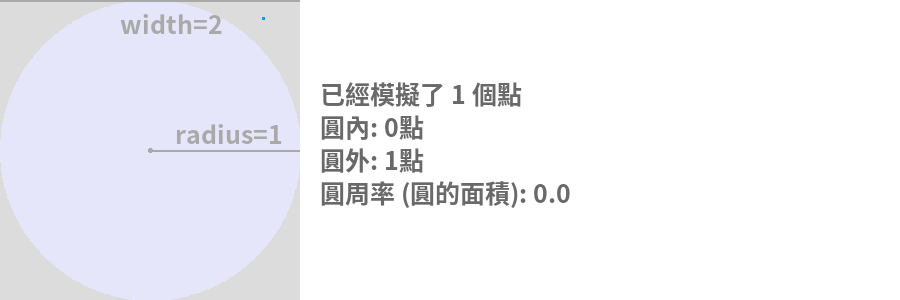

In [13]:
imglist[0]

### 完整版

一個一個點模擬，每次模擬完100次儲存圖片，共儲存50張圖片。  
所以用了兩個迴圈，裡面控制模擬次數，外面控制圖片數。

- 從載入套件  
- 畫布大小設定  
- 初始變數設定  
- 蒙地卡羅模擬的 背景圖 繪製  
- 模擬資訊的 底圖 繪製  
- 合併，放入list

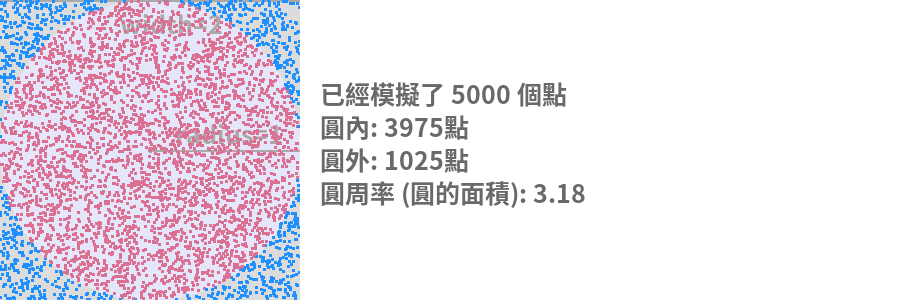

In [14]:
# 載入套件
import random
from PIL import Image, ImageDraw, ImageFont

# 畫布大小
width = 300
height = 300

# 準備的 list 是來儲存等等我們要做 GIF 的所有 image
imglist = []
incircle = 0
outcircle = 0

# ---背景圖
image = Image.new('RGBA', (width, height), color=(220,220,220))
draw = ImageDraw.Draw(image)

draw.ellipse((0, 0, width, height), fill=(230,230,250))
draw.line((width/2, height/2, width, height/2), fill=(169, 169, 169), width=2)
draw.ellipse((width/2 - 2, height/2 - 2, width/2 + 2, height/2 + 2), fill=(169, 169, 169))

fnt = ImageFont.truetype("../fonts/NotoSansCJKtc-Bold.otf", 25)
draw.text((175, 115), "radius=1", font=fnt, fill=(169, 169, 169))
draw.line((0, 0, 300, 0), fill=(169, 169, 169), width=2) #這行其實可以省略
draw.text((120, 5), "width=2", font=fnt, fill=(169, 169, 169))

# ---底圖，模擬每100次就儲存一張圖，共儲存50張。
for times in range(50):
    
    # 準備底圖
    fullimage = Image.new(mode='RGBA', size=(3 * width, height), color="white")
    fulldraw = ImageDraw.Draw(fullimage)
    fnt = ImageFont.truetype('../fonts/NotoSansCJKtc-Bold.otf', 25)
    
    for point in range(100):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)

        coordx = int(x*width/2 + width/2)
        coordy = int(-1*y*height/2 + height/2)
        
        if x ** 2 + y ** 2 <= 1:
            incircle = incircle+1
            draw.ellipse((coordx-1, coordy-1, coordx+1, coordy+1), fill = (219, 112, 147))
        else:
            outcircle = outcircle+1
            draw.ellipse((coordx-1, coordy-1, coordx+1, coordy+1), fill = (30,144,255))
        
    # 把 image 貼在整張大圖(底圖)的原點
    fullimage.paste(image.copy())
    
    # 文字message。
    msg = "已經模擬了 " + str(incircle + outcircle) + " 個點\n"
    msg = msg + "圓內: " + str(incircle) + "點\n"
    msg = msg + "圓外: " + str(outcircle) + "點\n"
    msg = msg + "圓周率 (圓的面積): " + str(4 * incircle / (incircle + outcircle)) + "\n"
    fulldraw.multiline_text((width + 20, height/4), msg, font=fnt, fill=(105,105,105))
    
    # 存入list中
    imglist.append(fullimage.copy())
    
imglist[-1]

## 做成 GIF

其實 GIF 就只是很多張圖片的連結而已，我們把我們剛剛儲存在 imglist 裡面的所有東西儲存
即可

In [15]:
# 先拿出 imglist[0] 當第一張
# 再將後續的圖接續上去
# duration: 每一張圖放映間隔
# loop: 1 代表重播一次, 0 代表永久循環
imglist[0].save('simuGIF.gif',
                save_all=True,
                append_images=imglist[1:],
                duration=100,
                loop=1)